TypeError: cannot unpack non-iterable AxesSubplot object

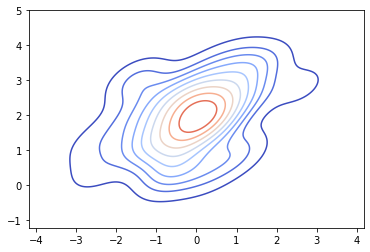

In [1]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(10)
import seaborn as sns
import seaborn.distributions as sd
from seaborn.palettes import color_palette, blend_palette
from six import string_types
import scipy.stats as sd


def _bivariate_kdeplot(x, y, filled, fill_lowest,
                       kernel, bw, gridsize, cut, clip,
                       axlabel, cbar, cbar_ax, cbar_kws, ax, **kwargs):
    """Plot a joint KDE estimate as a bivariate contour plot."""
    # Determine the clipping
    if clip is None:
        clip = [(-np.inf, np.inf), (-np.inf, np.inf)]
    elif np.ndim(clip) == 1:
        clip = [clip, clip]

    # Calculate the KDE
#     if sd._has_statsmodels:
#         xx, yy, z = sd._statsmodels_bivariate_kde(x, y, bw, gridsize, cut, clip)
#     else:
#         xx, yy, z = sd._scipy_bivariate_kde(x, y, bw, gridsize, cut, clip)
    xx, yy, z = sd._scipy_bivariate_kde(x, y, bw, gridsize, cut, clip)

    # Plot the contours
    n_levels = kwargs.pop("n_levels", 10)
    cmap = kwargs.get("cmap", "BuGn" if filled else "BuGn_d")
    if isinstance(cmap, string_types):
        if cmap.endswith("_d"):
            pal = ["#333333"]
            pal.extend(color_palette(cmap.replace("_d", "_r"), 2))
            cmap = blend_palette(pal, as_cmap=True)
        else:
            cmap = plt.cm.get_cmap(cmap)

    kwargs["cmap"] = cmap
    contour_func = ax.contourf if filled else ax.contour
    cset = contour_func(xx, yy, z, n_levels, **kwargs)
    if filled and not fill_lowest:
        cset.collections[0].set_alpha(0)
    kwargs["n_levels"] = n_levels

    if cbar:
        cbar_kws = {} if cbar_kws is None else cbar_kws
        ax.figure.colorbar(cset, cbar_ax, ax, **cbar_kws)

    # Label the axes
    if hasattr(x, "name") and axlabel:
        ax.set_xlabel(x.name)
    if hasattr(y, "name") and axlabel:
        ax.set_ylabel(y.name)

    return ax, cset

# monkey patching
sd._bivariate_kdeplot = _bivariate_kdeplot

# some data
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T

# plot
fig, ax = plt.subplots()
_, cs = sns.kdeplot(x=x, y=y, ax=ax, cmap="coolwarm")
# label the contours
plt.clabel(cs, cs.levels, inline=True)
# add a colorbar
fig.colorbar(cs)

plt.show()

In [2]:
ax, cs = sd._bivariate_kdeplot(x=x, y=y, filled=False, fill_lowest=False,
                       kernel=None, bw=None, gridsize=10, cut=0, clip=False,
                       axlabel='zz', cbar=False, cbar_ax=None, cbar_kws=None, ax=ax)

AttributeError: module 'scipy.stats' has no attribute '_scipy_bivariate_kde'

In [3]:
import scipy.stats as sd
import matplotlib.pyplot as plt
def bivariate_gaussian_fit(x , y, gridsize, levels, line_color, ax, ax_xlim, ax_ylim):
    xmin = x.min()

    xmax = x.max()

    ymin = y.min()

    ymax = y.max()
    
    X, Y = np.mgrid[xmin:xmax:gridsize*1j, ymin:ymax:gridsize*1j]
    
    positions = np.vstack([X.ravel(), Y.ravel()])

    values = np.vstack([x, y])

    kernel = sd.gaussian_kde(values,bw_method = 'scott')

    Z = np.reshape(kernel(positions).T, X.shape)
    
    cset = ax.contour(X, Y, Z, levels, colors = line_color)

    ax.clabel(cset, cset.levels, inline=True)
    
    ax.set_xlim(ax_xlim)

    ax.set_ylim(ax_ylim)

#     axes.show()


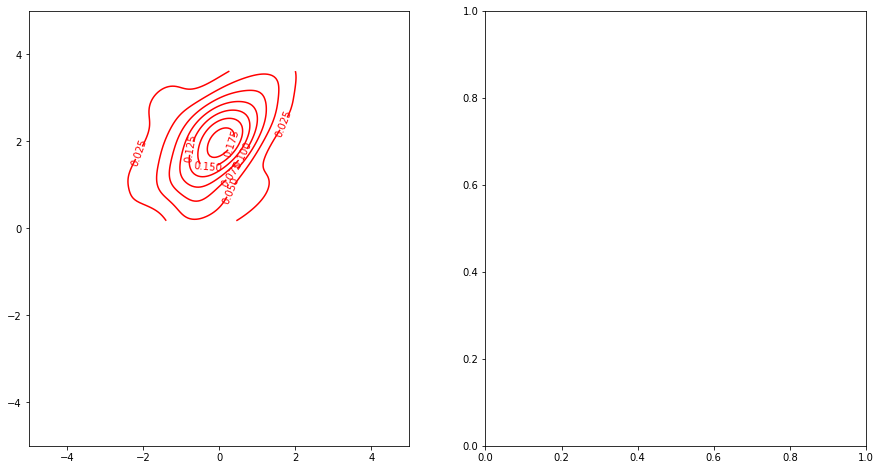

In [4]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
bivariate_gaussian_fit(x , y, gridsize=100, levels=8, line_color='red', ax =ax1, ax_xlim=[-5,5], ax_ylim = [-5,5])
plt.show()

In [5]:
m1 = x
m2 = y
xmin = m1.min()

xmax = m1.max()

ymin = m2.min()

ymax = m2.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([X.ravel(), Y.ravel()])

values = np.vstack([m1, m2])

kernel = sd.gaussian_kde(values)

Z = np.reshape(kernel(positions).T, X.shape)



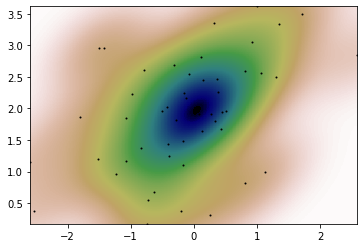

In [6]:


fig, ax = plt.subplots()

ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,

          extent=[xmin, xmax, ymin, ymax])

ax.plot(m1, m2, 'k.', markersize=2)

ax.set_xlim([xmin, xmax])

ax.set_ylim([ymin, ymax])

plt.show()


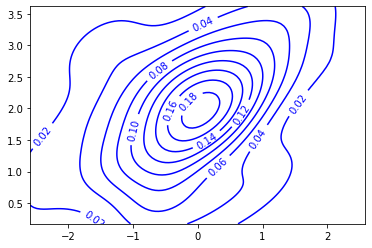

In [7]:
cset = plt.contour(X, Y, Z, 10,colors='blue')
plt.clabel(cset, cset.levels, inline=True)
plt.show()

In [8]:
lev = 100
X, Y = np.mgrid[xmin:xmax:lev*1j, ymin:ymax:lev*1j]
print(X)

[[-2.59154076 -2.59154076 -2.59154076 ... -2.59154076 -2.59154076
  -2.59154076]
 [-2.53925803 -2.53925803 -2.53925803 ... -2.53925803 -2.53925803
  -2.53925803]
 [-2.48697531 -2.48697531 -2.48697531 ... -2.48697531 -2.48697531
  -2.48697531]
 ...
 [ 2.47988363  2.47988363  2.47988363 ...  2.47988363  2.47988363
   2.47988363]
 [ 2.53216636  2.53216636  2.53216636 ...  2.53216636  2.53216636
   2.53216636]
 [ 2.58444908  2.58444908  2.58444908 ...  2.58444908  2.58444908
   2.58444908]]


In [16]:
#  importing the module
import pandas as pd
  
# creating a DataFrame
data = {'1' : ['g', 'e', 'e'], 
        '2' : ['k', 's', 'f'], 
        '3' : ['o', 'r', 'g'], 
        '4' : ['e', 'e', 'k']}
df = pd.DataFrame(data)
print("Original DataFrame")
display(df)
X = df.iloc[1]  
print("Value of row 1")
type(X)
type(X.values)

Original DataFrame


,1,2,3,4
0,g,k,o,e
1,e,s,r,e
2,e,f,g,k


Value of row 1


numpy.ndarray